<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-и-загрузка-данных" data-toc-modified-id="Подготовка-и-загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка и загрузка данных</a></span></li><li><span><a href="#Анализ-и-подготовка-данных" data-toc-modified-id="Анализ-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Разделение-ряда-на-составляющие-(тренд,-сезонность-и-шум)" data-toc-modified-id="Разделение-ряда-на-составляющие-(тренд,-сезонность-и-шум)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Разделение ряда на составляющие (тренд, сезонность и шум)</a></span><ul class="toc-item"><li><span><a href="#Данные-10-по-15-августа" data-toc-modified-id="Данные-10-по-15-августа-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Данные 10 по 15 августа</a></span></li></ul></li><li><span><a href="#Тест-Дики-Фуллера-на-стационарность-ряда" data-toc-modified-id="Тест-Дики-Фуллера-на-стационарность-ряда-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Тест Дики-Фуллера на стационарность ряда</a></span></li><li><span><a href="#Автокорреляция" data-toc-modified-id="Автокорреляция-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Автокорреляция</a></span></li></ul></li><li><span><a href="#Выводы-по-разделу:" data-toc-modified-id="Выводы-по-разделу:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы по разделу:</a></span></li></ul></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-LightGBMRegressor" data-toc-modified-id="Модель-LightGBMRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель LightGBMRegressor</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Выводы-по-проекту" data-toc-modified-id="Выводы-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы по проекту</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

*Уважаемый ревьювер представляю на проверку проект. Замечания и предложения по улучшению проекта принимаются. Надеюсь все будет понятно.*

#  Проект "Прогнозирование заказов такси"

**<i>Цель: Разработать модель прогнозирующую стоимость автомобиля. </i>**

**Задачами проекта являются:**
1. Выбрать модель прогнозирования количества заказов такси в час:
    - качества прогнозирования, метрика RMSE должна быть не больше 48.

**Объектом исследования является датасет со статистикой количества заказов такси.** 

**Проект выполняется в основных этапов:**
1. Подготовка и загрузка данных.
2. Анализ и данных
3. Подготовка признаков.
4. Обучение моделей.
5. Тестирование моделей.
6. Общий выввод.

## Подготовка и загрузка данных

In [1]:
# Импорт библиотек.
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor

In [2]:
#Загрузка данных
pth1 = 'taxi.csv'
pth2 = '/datasets/taxi.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, index_col=[0], parse_dates=[0])
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

## Анализ и подготовка данных

### Общая информация

In [3]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# Статистики данных (число заказов)
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


**Выводы:**

1. Явных пропусков данных нет.
2. Максимальное значение числа заказов значительно превышает среднее значение, но судя по распределению таких выдающихся часов очень мало.

### Анализ данных

In [5]:
# Сортировка данных по индексу
df.sort_index(inplace=True)
# Ресемплирование данных по 1 часу
df = df.resample('1H').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


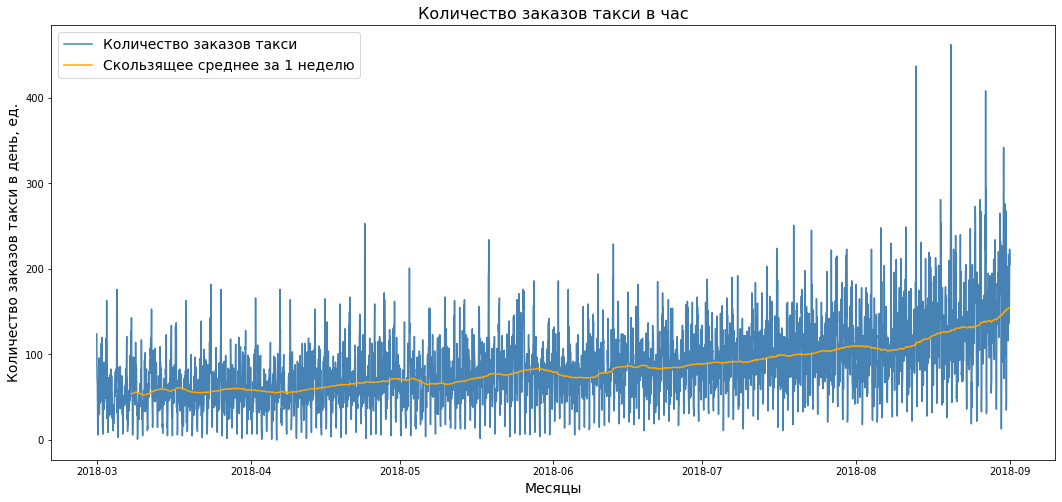

In [6]:
# График числа заказов и среднее за неделю
plt.figure(figsize = (18,8))
 
plt.plot(df, label = 'Количество заказов такси', color = 'steelblue')
plt.plot(df.rolling(window = 7*24).mean(), label = 'Скользящее среднее за 1 неделю', color = 'orange')
 
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество заказов такси в день, ед.', fontsize = 14)
plt.title('Количество заказов такси в час', fontsize = 16)
 
plt.show()

**Выводы:**

1. Наблюдается наличие тренда, количество заказов со временем растет, для оценки тренда необходимо провести тест Дики-Фуллера, в случае если гипотеза о наличии тренда не подтвердится, то будем считать, что наблюдаемый тренд не является сильно выраженным и не должен исказить результаты предсказания.
2. Также заметны дни с экстримальным количеством заказов, удалять данные значения не будем, так как они не являются ошибками. В случае если качество предсказания будет неудовлетворительным, то вероятно будет необходимо отфильтровать данные.

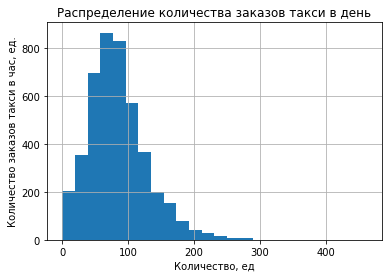

In [7]:
# Гистограмма распределения числа заказов
df['num_orders'].hist(bins=24)
plt.xlabel('Количество, ед', fontsize = 10)
plt.ylabel('Количество заказов такси в час, ед.', fontsize = 10)
plt.title('Распределение количества заказов такси в день', fontsize = 12)

plt.show()

**Выводы:**

1. Распределение количества заказов похоже на распределение Пуассона.

#### Разделение ряда на составляющие (тренд, сезонность и шум)

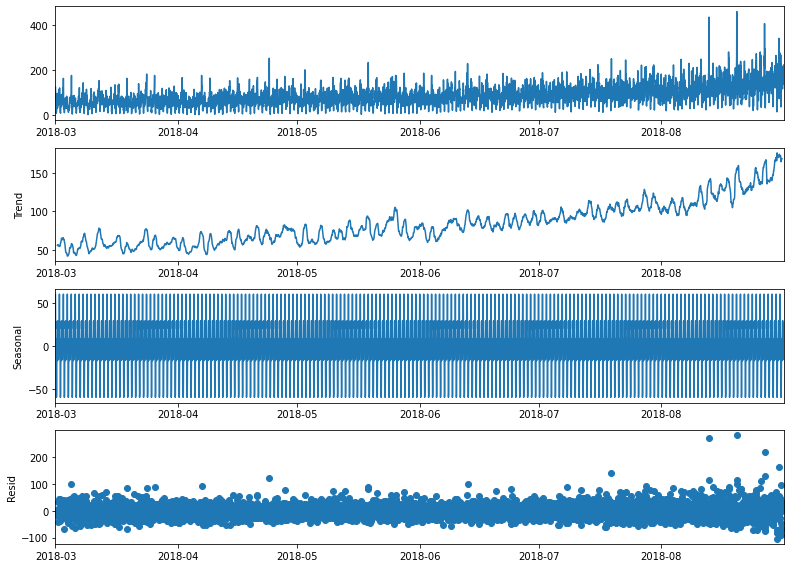

In [8]:
# Декомпозиция данных на составляющие (тренд, сезонность и шум)
rcParams['figure.figsize'] = 11, 8
decompose = seasonal_decompose(df)
decompose.plot()
 
plt.show()

**Выводы:**

1. Наблюдается наличие тренда, но не ярко выраженного.
2. Наблюдается сезонность в данных, что логично, прос на данную услугу зависит как от времени, так и от дня недели.
3. Шум в данных распределен равномерно без ярко выреженных экстримальных значений, только в конце временного ряда диапазон расширяется и появляются экстримальные значения.

##### Данные 10 по 15 августа

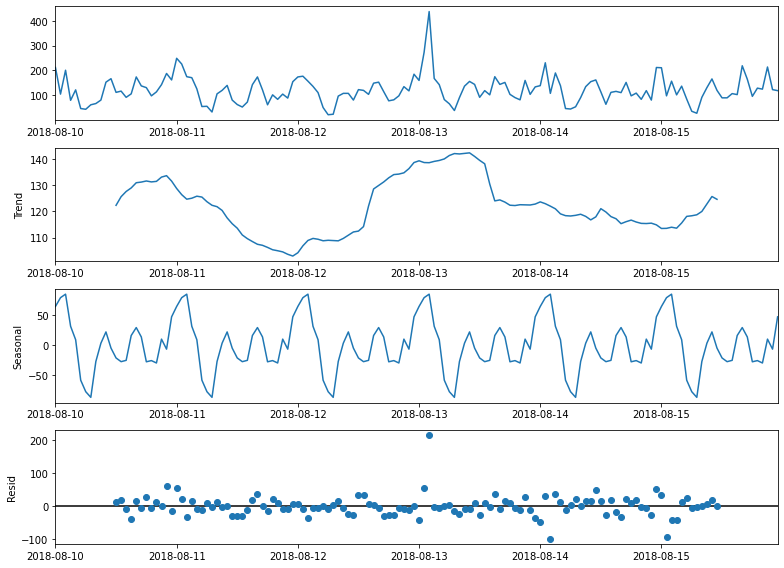

In [9]:
# Декомпозиция данных на составляющие (тренд, сезонность и шум)
rcParams['figure.figsize'] = 11, 8
df_period = df['2018-08-10 00:00:00':'2018-08-15 23:00:00']
decompose = seasonal_decompose(df_period)
decompose.plot()
 
plt.show()

**Выводы:**

1. В данных за вторую неделю августа нет тренда, небольшое возмущение вносит повышение количества заказов 13 августа
2. Наблюдается суточная сезонность в данных. Число заказов меняется от времени суток, утром минимальное, в обед выходит на плато, вечером количество заказов начинает расти, затем падает.

#### Тест Дики-Фуллера на стационарность ряда

Проведем тест Дики-Фуллера для оценки стационарности ряда.

In [10]:
# Тест на Дики-Фуллера на стационарность ряда, проверка при различном уровне значимости.
result = adfuller(df['num_orders'], autolag='AIC')

print('Критерий ADF: %f' % result[0])

print('P-значение: %f' % result[1])

print('Критические значения:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Нулевая гипотеза отвергнута – Временной ряд стационарен")
    else:
        print ("Нулевая гипотеза не отвергнута – Временной ряд не стационарен")

Критерий ADF: -3.068924
P-значение: 0.028940
Критические значения:
	1%: -3.432
Нулевая гипотеза отвергнута – Временной ряд стационарен
	5%: -2.862
Нулевая гипотеза отвергнута – Временной ряд стационарен
	10%: -2.567
Нулевая гипотеза отвергнута – Временной ряд стационарен


**Выводы:**

1. Считаем ряд стационарным.

#### Автокорреляция

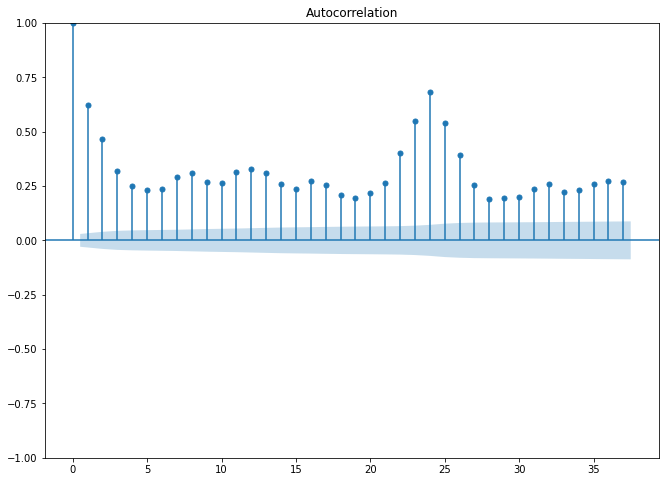

In [11]:
# Расчет автокорелляция и построение графика найденных значений
plot_acf(df)
plt.show()

**Выводы:**

1. Ряд имеет статистически значимую автокорелляцию (точки расположены выше синей области).
2. Наблюдается средняя прямая автокорреляция данных с лагом 1, 2 и 23, 24, 26, 27 и сильная - 25. Данные лаги необходимо учесть при моделировании.

### Выводы по разделу:

1. Рассматриваемый временной ряд является стационарным - проверено тестом Дики-Фуллера. Ряд характеризуется суточной сезонностью.
2. Определены временные лаги имеющие наибольшую корреляцию с исходным рядом.
3. Данные ряда подходят для обучения модели прогнозирования.

## Подготовка признаков

In [12]:
# Функция извлечения признаков из исходного ряда и их добавление в датавфрейм.
def make_features(df, max_lag, rolling_mean_size):
    df_n = df.copy()
    df_n['month'] = df_n.index.month
    df_n['day'] = df_n.index.day
    df_n['dayofweek'] = df_n.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df_n['lag_{}'.format(lag)] = df_n['num_orders'].shift(lag)

    df_n['rolling_mean'] = df_n['num_orders'].shift().rolling(rolling_mean_size).mean()
    return df_n

In [13]:
# Запуск функции извлечения признаков
df_new = make_features(df, 27, 14)
df_new.head(15)

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,3,1,3,43.0,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 06:00:00,12,3,1,3,6.0,43.0,66.0,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 07:00:00,15,3,1,3,12.0,6.0,43.0,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 08:00:00,34,3,1,3,15.0,12.0,6.0,43.0,66.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Разедление временного ряда на обучающую и тестовую выборки
train, test = train_test_split(df_new, shuffle=False, test_size=0.1)
train = train.dropna()

In [15]:
#display(train.head())
#display(test.head())

In [16]:
# Выделение признаков и целевого признака для двух типов выборок
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

### Выводы по разделу

1. Подготовлены признаки для модели (месяц, число и день недели, лаги до 27 порядка, среднее скользящее 14 порядка)
2. Проведено разделение на обучающую и тестовую выборки.

## Обучение моделей

### Модель LinearRegression

In [17]:
# Создание экземпляра класса модели, задание количества разделений данных для кросс-валидации 
# и ее расчет, вывод метрики оценки.
model_lr = LinearRegression()
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model_lr, 
                         features_train, 
                         target_train, 
                         cv=tscv, 
                         scoring = 'neg_root_mean_squared_error')
scores.mean()

-26.67852561695596

### Модель LightGBMRegressor

In [18]:
# Создание экземпляра класса модели, задание параметров модели и количества разделений данных для 
# кросс-валидации, подбор оптимальных гиперпараметров, вывод метрики оценки.
model_lgbm = LGBMRegressor(random_state = 10)
params = {'max_depth' : [-1, 3],
          'learning_rate' : [0.03, 0.1, 0.2],
          'n_estimators' : [50, 60]
               }
tscv = TimeSeriesSplit(n_splits=5)
gridsearch_lgbm = GridSearchCV(estimator=model_lgbm, 
                            cv=tscv,
                            param_grid=params, 
                            scoring = 'neg_root_mean_squared_error')
gridsearch_lgbm.fit(features_train, target_train)
gridsearch_lgbm.best_score_

-25.488638652297453

In [19]:
# Вывод оптимальных гиперпараметров модели
gridsearch_lgbm.best_params_

{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 60}

### Выводы по разделу

1. Обучены две модели LinearRegression и LGBMRegressor.
2. Подобраны гиперпараметры для LGBMRegressor.

## Тестирование моделей

In [20]:
# Тестирование моделей на тестовой выборки и вывод значения метрики RMSE
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_test)
rmse = mean_squared_error(predictions, target_test) ** 0.5
print(f'Метрика RMSE для модели {model_lr}: {rmse:0.1F}')

Метрика RMSE для модели LinearRegression(): 46.0


In [21]:
# Тестирование моделей на тестовой выборки и вывод значения метрики RMSE
model_lgbm.fit(features_train, target_train)
predictions = model_lgbm.predict(features_test)
rmse = mean_squared_error(predictions, target_test) ** 0.5
print(f'Метрика RMSE для модели {model_lgbm}: {rmse:0.1F}')

Метрика RMSE для модели LGBMRegressor(random_state=10): 42.6


## Выводы по проекту

1. Метрика качества предсказания рассмотренных моделей соответствует требованиям заказчика.
2. В данном случае, с точки зрения качества, лучше использовать LGBMRegressor с метрикой RMSE равной 42.6